In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [6]:
df = pd.DataFrame(data=x, columns=feature_names)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [7]:
np.unique(t)

array([0, 1, 2])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0).fit(x_train, t_train)

In [10]:
# 決定技の正解率が確認できる
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


In [11]:
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [14]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

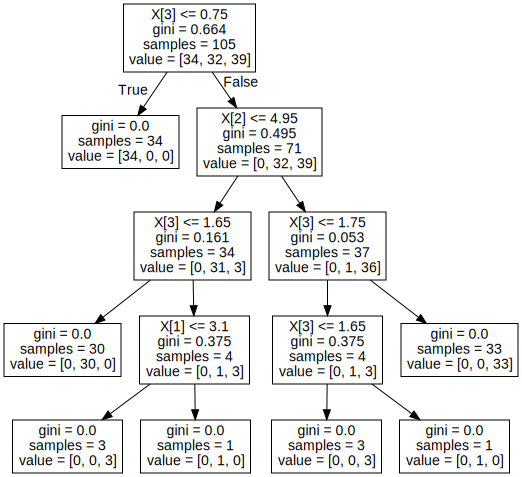

In [16]:
graph_tree = graphviz.Source(dot_data)
graph_tree

In [17]:
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

<BarContainer object of 4 artists>

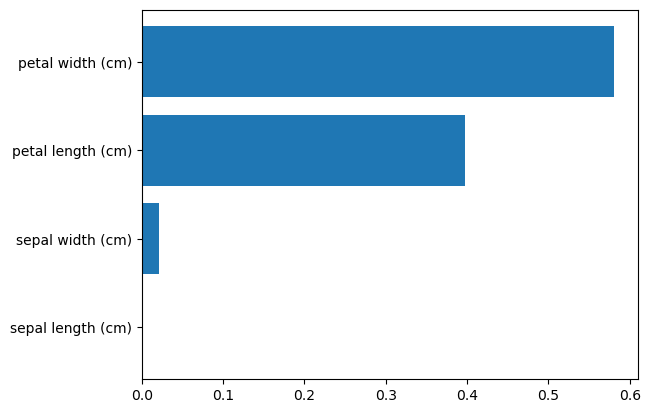

In [19]:
y = feature_names
width = feature_importance

plt.barh(y=y, width=width)

In [22]:
from sklearn.svm import SVC
svc = SVC().fit(x_train, t_train)

# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [24]:
std_scaler.fit(x_train)

StandardScaler()

In [26]:
# 標準化
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [27]:
round(x_train_std.mean())

0

In [28]:
round(x_train_std.std())

1

In [29]:
svc_std = SVC()

In [30]:
svc_std.fit(x_train_std, t_train)

SVC()

In [31]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777
train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777
